In [22]:
#reading the train.ft.txt file and test.ft.txt file and storing it in a dataframe

import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from matplotlib import pyplot as plt
#reading the train.ft.txt file and test.ft.txt file and storing it in a dataframe

train_df = pd.read_csv('train_data_400k_randomsample.csv')
test_df = pd.read_csv('test_data_44k.csv')

#visualizing the dataframes

display(train_df)


,sentences,labels
0,mini chopper: this is a great handy little cho...,1
1,not what your looking for?: this camera may lo...,0
2,"mistitled: the title of this book should be ""s...",0
3,"great book, broad range of projects: easy to u...",1
4,not very useful: maybe i was a bit late in rea...,0
...,...,...
399995,"it is a pretty light book, good for beach read...",1
399996,elvis back in memphis: the mix was so bad i re...,0
399997,extremely moving: i forgot this movie. i watch...,1
399998,"poor whitney: well, i know several people who ...",0


In [4]:
train_df["0"] = train_df[0].str.replace('__label__', '')
train_df['sentiment'] = train_df[0].str[0].astype(int) - 1  # subtracting 1 to make the labels 0 (negative) and 1 (positive)
train_df['review'] = train_df[0].str[1:]
train_df = train_df.drop([0], axis=1)

KeyError: 0

In [11]:
def clean_text(text):
    ''' 
    Some basic text cleaning phases this function should be applied to the text column
    of the data
    '''
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = set(stopwords.words('english'))
    stop = [w for w in stop if w not in ['not', 'no']]
    text = [x for x in text if (x not in stop)]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    # tokenize the text
    #text = text.split()
    return(text)

In [16]:
# Checking the balance of the classes using `train_df['sentiment'].value_counts()` to see how many positive and negative reviews there are

train_df['sentences']=train_df['sentences'].apply(lambda x: clean_text(x))



In [17]:
# Finding the most common words in positive and negative reviews. This can give an idea of which words are most associated with each sentiment.

from collections import Counter

# Positive words
pos = train_df[train_df['labels'] == 1]
pos = pos['sentences']

pos_counts = Counter()
for idx, row in pos.iteritems():
    pos_counts.update(row.split())

print('Positive words: ', pos_counts.most_common(20))

# Negative words
neg = train_df[train_df['labels'] == 0]
neg = neg['sentences']

neg_counts = Counter()
for idx, row in neg.iteritems():
    neg_counts.update(row.split())

print('Negative words: ', neg_counts.most_common(20))



/tmp/ipykernel_788/1159105739.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in pos.iteritems():


Positive words:  [('book', 111480), ('great', 91294), ('not', 77928), ('one', 72136), ('good', 65578), ('like', 53700), ('read', 43423), ('love', 39710), ('best', 35668), ('would', 35519), ('well', 34855), ('time', 33036), ('really', 32640), ('get', 32525), ('movie', 30156), ('first', 26643), ('cd', 25556), ('much', 24820), ('no', 24659), ('album', 24595)]


/tmp/ipykernel_788/1159105739.py:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in neg.iteritems():


Negative words:  [('not', 178781), ('book', 102806), ('one', 75096), ('like', 59902), ('would', 57252), ('no', 49176), ('good', 47766), ('get', 43307), ('time', 38268), ('even', 34979), ('movie', 34671), ('read', 32124), ('really', 31025), ('buy', 31014), ('much', 30656), ('product', 30381), ('money', 29634), ('first', 28552), ('work', 26602), ('great', 26082)]


In [35]:
from collections import Counter

# Positive words
pos = train_df[train_df['labels'] == 1]
pos = pos['sentences']

pos_counts = Counter()
for idx, row in pos.iteritems():
    pos_counts.update(row.split())

# Negative words
neg = train_df[train_df['labels'] == 0]
neg = neg['sentences']

neg_counts = Counter()
for idx, row in neg.iteritems():
    neg_counts.update(row.split())

# Calculate ratio of positive to negative appearance
word_ratios = {}
for word, count in pos_counts.items():
    if word in neg_counts:
        word_ratio = count / neg_counts[word]
        word_ratios[word] = word_ratio

# Sort the words based on the ratio in descending order
sorted_ratios = sorted(word_ratios.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 words and their ratios
print('Top 20 positive-to-negative ratio words:')
for word, ratio in sorted_ratios[:20]:
    print(f'{word}: {ratio:.2f}')

positive_20 = sorted_ratios[:20]

/tmp/ipykernel_788/4076330248.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in pos.iteritems():
/tmp/ipykernel_788/4076330248.py:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in neg.iteritems():


Top 20 positive-to-negative ratio words:
awesome!:: 390.00
excellent!:: 125.50
rocks!:: 99.50
superb:: 83.00
excellent:: 82.44
mastodon: 80.00
must!: 79.00
brilliant:: 72.50
awesome:: 71.50
inspirational:: 67.00
value!:: 65.00
outstanding!:: 60.00
wonderful!:: 59.00
delight:: 57.00
fantastic!:: 53.33
handy:: 53.00
outstanding:: 49.67
masterpiece!:: 48.00
underappreciated: 46.00
best!!:: 44.00


In [36]:
# Positive words
pos = train_df[train_df['labels'] == 1]
pos = pos['sentences']

pos_counts = Counter()
for idx, row in pos.iteritems():
    pos_counts.update(row.split())

# Negative words
neg = train_df[train_df['labels'] == 0]
neg = neg['sentences']

neg_counts = Counter()
for idx, row in neg.iteritems():
    neg_counts.update(row.split())

# Calculate ratio of negative to positive appearance
word_ratios = {}
for word, count in neg_counts.items():
    if word in pos_counts:
        word_ratio = count / pos_counts[word]
        word_ratios[word] = word_ratio

# Sort the words based on the ratio in descending order
sorted_ratios = sorted(word_ratios.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 words and their ratios
print('Top 20 negative-to-positive ratio words:')
for word, ratio in sorted_ratios[:20]:
    print(f'{word}: {ratio:.2f}')

negative_20 = sorted_ratios[:20]

/tmp/ipykernel_788/1038477472.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in pos.iteritems():
/tmp/ipykernel_788/1038477472.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, row in neg.iteritems():


Top 20 negative-to-positive ratio words:
awful:: 644.00
junk:: 300.50
garbage:: 212.33
terrible:: 181.00
useless:: 176.00
awful!:: 153.00
horrible!:: 146.00
trash:: 126.50
failure:: 110.00
disappointing:: 109.06
rubbish:: 106.00
drivel:: 106.00
awful!: 102.00
junk!:: 95.50
money!!:: 94.00
disappointment!:: 93.50
junk!: 89.00
yawn:: 89.00
beware!!!: 88.00
pathetic:: 88.00


In [48]:
z=0
for i,j in positive_20:
    print(i + " & " + str(j)+"\\\\")
    print("\hline")
    z+=1
    if z == 11:
        break

awesome!: & 390.0\\
\hline
excellent!: & 125.5\\
\hline
rocks!: & 99.5\\
\hline
superb: & 83.0\\
\hline
excellent: & 82.44444444444444\\
\hline
mastodon & 80.0\\
\hline
must! & 79.0\\
\hline
brilliant: & 72.5\\
\hline
awesome: & 71.5\\
\hline
inspirational: & 67.0\\
\hline
value!: & 65.0\\
\hline


/tmp/ipykernel_788/195797586.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(words1, rotation=45)
/tmp/ipykernel_788/195797586.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(words2, rotation=45)


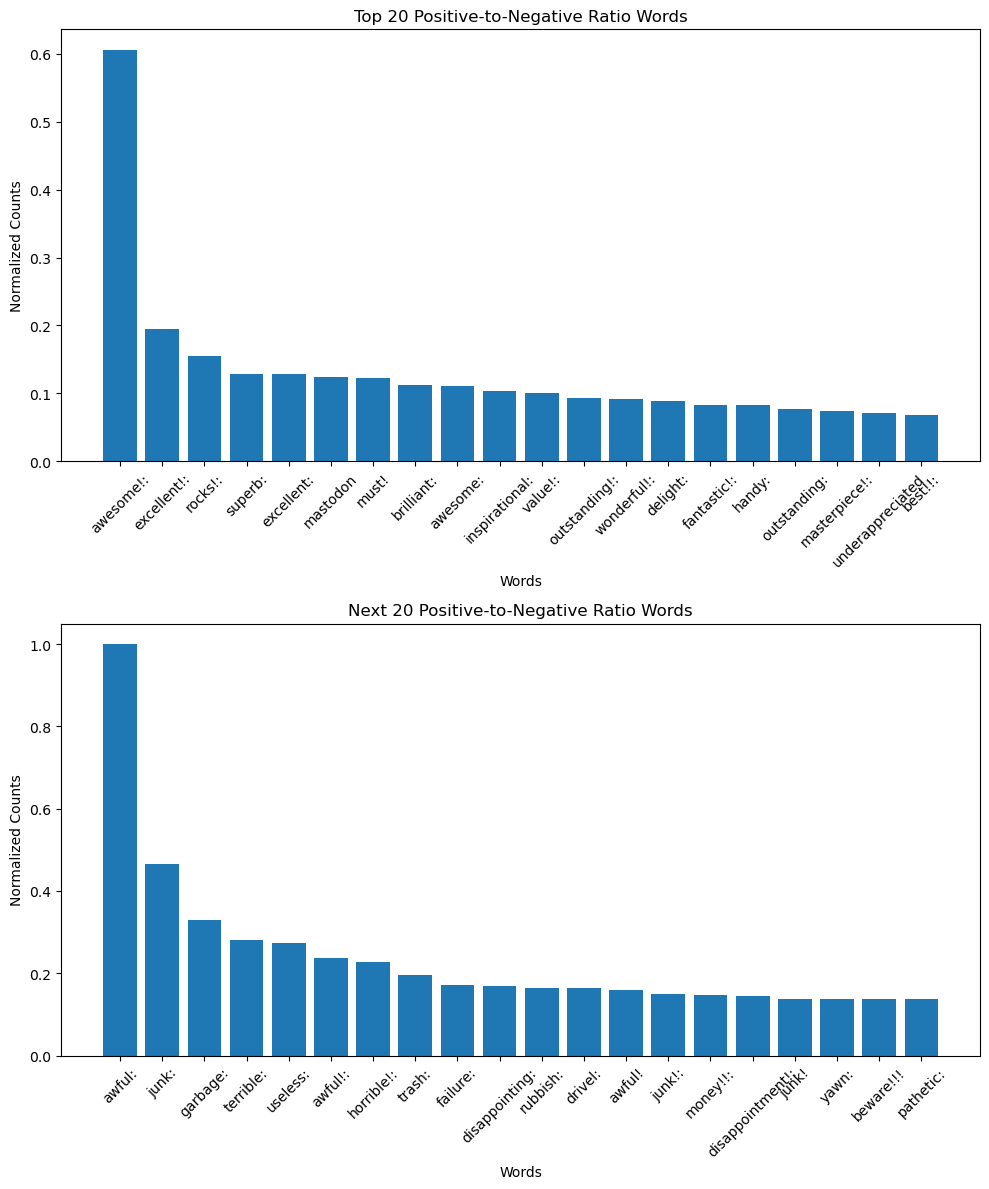

In [37]:
words1, counts1 = zip(*positive_20)
words2, counts2 = zip(*negative_20)

# Normalize the counts
max_count = max(max(counts1), max(counts2))
normalized_counts1 = np.array(counts1) / max_count
normalized_counts2 = np.array(counts2) / max_count

# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot for the first set of words
axes[0].bar(words1, normalized_counts1)
axes[0].set_xticklabels(words1, rotation=45)
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Normalized Counts')
axes[0].set_title('Top 20 Positive-to-Negative Ratio Words')

# Plot for the second set of words
axes[1].bar(words2, normalized_counts2)
axes[1].set_xticklabels(words2, rotation=45)
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Normalized Counts')
axes[1].set_title('Next 20 Positive-to-Negative Ratio Words')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


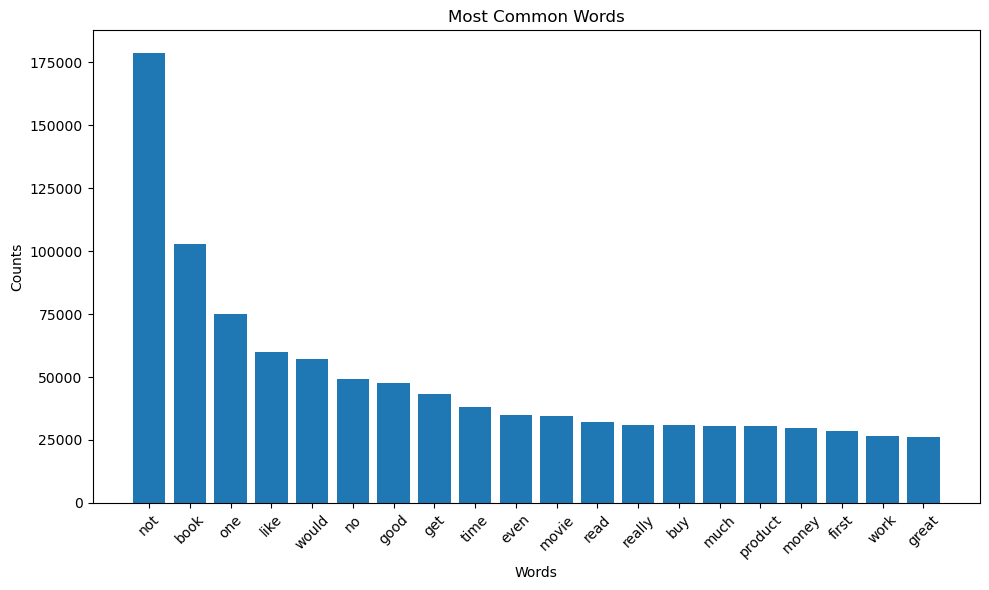

In [24]:
words, counts = zip(*neg_counts.most_common(20))
# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Most Common Words')
plt.tight_layout()

# Display the plot
plt.show()

## As one can see, the text data needs basic preprocessing and cleaning to deal with stopwords.

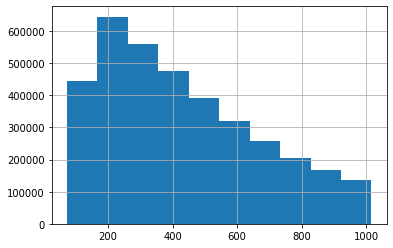

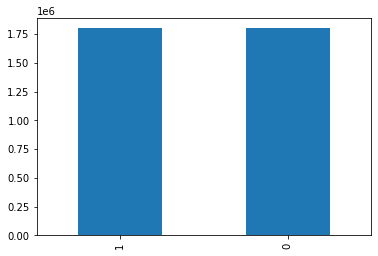

KeyboardInterrupt: 

In [22]:
# Visualizing the data to create a histogram of review lengths, a bar chart of the number of reviews of each sentiment, a word cloud, etc.

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Histogram of review lengths
train_df['review'].str.len().hist()
plt.show()

# Bar chart of number of reviews of each sentiment
train_df['sentiment'].value_counts().plot(kind='bar')
plt.show()

# Word cloud of positive reviews
pos_cloud = WordCloud(width=700, height=500, background_color='white', stopwords=STOPWORDS).generate(" ".join(pos))
plt.figure(figsize=(10, 8), facecolor='r')
plt.imshow(pos_cloud)
plt.axis('off')

# Word cloud of negative reviews
neg_cloud = WordCloud(width=700, height=500, background_color='white', stopwords=STOPWORDS).generate(" ".join(neg))
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(neg_cloud)
plt.axis('off')



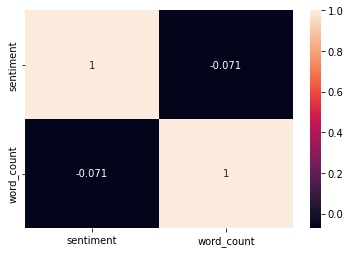

In [23]:
#Visualizin a correlation matrix of the review length, the number of words, and the sentiment score. This can show if there are any interesting correlations between the different features.

sns.heatmap(train_df.corr(), annot=True)
plt.show()



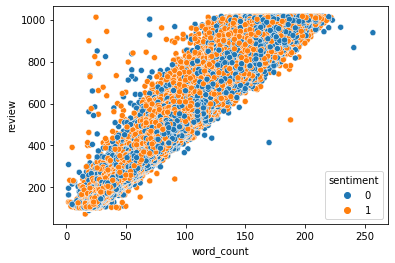

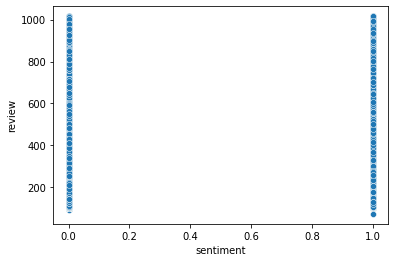

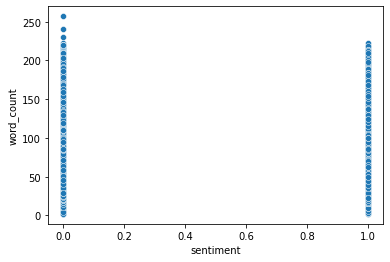

In [26]:
#Using scatter and density plots to further investigate the relationship between the review length, the number of words, and the sentiment score.

# Scatter plot of review length and number of words
sns.scatterplot(x=train_df['word_count'], y=train_df['review'].str.len(), hue=train_df['sentiment'])
plt.show()

#Density plot of review length and number of words
# sns.kdeplot(x=train_df['word_count'], y=train_df['review'].str.len())
# plt.show ()

# Scatter plot of review length and sentiment
sns.scatterplot(x=train_df['sentiment'], y=train_df['review'].str.len())
plt.show()

# Density plot of review length and sentiment
# sns.kdeplot(x=train_df['sentiment'], y=train_df['review'].str.len())
# plt.show()

# Scatter plot of number of words and sentiment
sns.scatterplot(x=train_df['sentiment'], y=train_df['word_count'])
plt.show()

# Density plot of number of words and sentiment
# sns.kdeplot(x=train_df['sentiment'], y=train_df['word_count'])
# plt.show()

